In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cumulative_average(numbers):
    numbers = np.array(numbers)
    cum_sum = np.cumsum(numbers)
    indices = np.arange(1, len(numbers) + 1)
    cum_avg = cum_sum / indices
    return cum_avg.tolist()

In [18]:
names_of_files = 'acdm_rpf2d_20240316-000844_metrics_ms.pkl,\
acdm_rpf2d_20240316-000739_metrics_ms.pkl,\
pde_refiner_rpf2d_20240215-203203_metrics_ms.pkl,\
pde_refiner_rpf2d_20240219-201931_metrics_ms.pkl'

name_of_files = names_of_files.split(',')

In [19]:
name_of_files

['pde_refiner_rpf2d_20240215-203203_metrics_ms.pkl',
 'pde_refiner_rpf2d_20240219-201931_metrics_ms.pkl']

In [20]:
metrics_list = []
for i in range(len(name_of_files)):
    metrics_list.append(pickle.load(open('./thesis_results/multiple_samples/'+name_of_files[i], 'rb')))

In [21]:
column_mean=[]
column_mean_target=[]
column_std=[]
column_std_target=[]
    
for metrics in metrics_list:
    cumulative_average_of_mse = []
    cumulative_average_of_mse_target = []
    
    cumulative_average_of_ekin = []
    cumulative_average_ekin_target = []
    
    cumulative_average_of_sinkhorn = []
    cumulative_average_of_sinkhorn_target = []
    for rollout in metrics.values():
        for k, v in rollout.items():
            #determine the cumulative average of the metrics
            if k =='mse':
                cumulative_average_of_mse.append(cumulative_average(v))
                cumulative_average_of_mse_target.append(np.zeros(len(v)))
            if k =='e_kin':
                cumulative_average_of_ekin.append(cumulative_average(v['predicted']))
                cumulative_average_ekin_target.append(cumulative_average(v['target']))
                
            if k =='sinkhorn':
                cumulative_average_of_sinkhorn.append(cumulative_average(v))
                cumulative_average_of_sinkhorn_target.append(np.zeros(len(v)))

    cumulative_average_of_mse = np.array(cumulative_average_of_mse)
    cumulative_average_of_ekin = np.array(cumulative_average_of_ekin)
    cumulative_average_ekin_target = np.array(cumulative_average_ekin_target)
    cumulative_average_of_sinkhorn = np.array(cumulative_average_of_sinkhorn)

    column_mean_position = np.mean(cumulative_average_of_mse, axis=0)
    column_std_position = np.std(cumulative_average_of_mse, axis=0)
    column_mean_position_target = np.mean(cumulative_average_of_mse_target, axis=0)
    column_std_position_target = np.std(cumulative_average_of_mse_target, axis=0)

    column_mean_ekin = np.mean(cumulative_average_of_ekin, axis=0)
    column_std_ekin = np.std(cumulative_average_of_ekin, axis=0)
    column_mean_ekin_target = np.mean(cumulative_average_ekin_target, axis=0)
    column_std_ekin_target = np.std(cumulative_average_ekin_target, axis=0)

    column_mean_sinkhorn = np.mean(cumulative_average_of_sinkhorn, axis=0)
    column_std_sinkhorn = np.std(cumulative_average_of_sinkhorn, axis=0)
    column_mean_sinkhorn_target = np.mean(cumulative_average_of_sinkhorn_target, axis=0)
    column_std_sinkhorn_target = np.std(cumulative_average_of_sinkhorn_target, axis=0)

    column_mean.append([column_mean_position,column_mean_ekin, column_mean_sinkhorn])  
    column_mean_target.append([column_mean_position_target, column_mean_ekin_target, column_mean_sinkhorn_target])
    
    column_std.append([column_std_position, column_std_ekin, column_std_sinkhorn])
    column_std_target.append([column_std_position_target, column_std_ekin_target, column_std_sinkhorn_target])

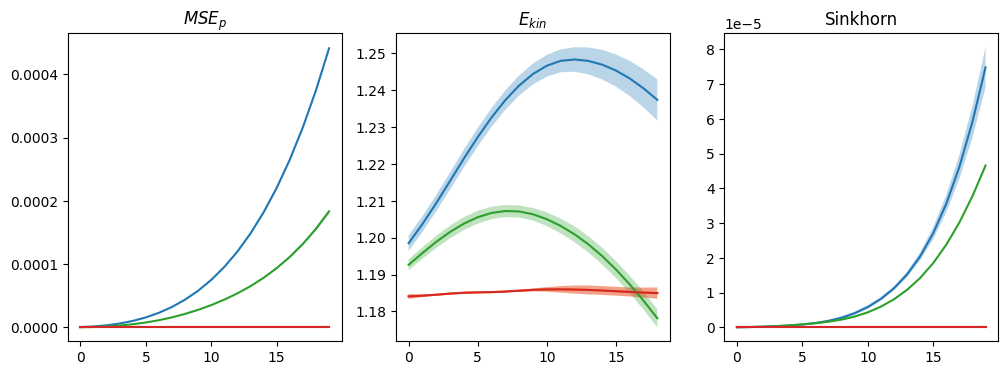

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for j in range(len(metrics_list)):# runs as many times as the number of files
    for i,m in enumerate(['$MSE_p$', '$E_{kin}$', 'Sinkhorn']): 
        ax[i].plot(np.arange(len(column_mean[j][i])),column_mean[j][i])
        ax[i].plot(np.arange(len(column_mean_target[j][i])),column_mean_target[j][i])
        
        ax[i].fill_between(x=np.arange(len(column_mean[j][i])),y1=column_mean[j][i] - column_std[j][i], 
                        y2=column_mean[j][i] + column_std[j][i], 
                        alpha=0.3, label='Standard Deviation')
        ax[i].fill_between(x=np.arange(len(column_mean_target[j][i])),y1=column_mean_target[j][i] - column_std_target[j][i], 
                        y2=column_mean_target[j][i] + column_std_target[j][i], 
                        alpha=0.3, label='Standard Deviation')
        ax[i].set_title(m)